In [ ]:
import numpy as np
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout

import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

# Pipline

## 1- Loading the dataset
## 2- Data visialization & preprocessing
## 3- Model training
## 4- Model evaluation

# Loading the data

In [ ]:
# Loading the dataset
Cifar10=keras.datasets.cifar10 # Loading the dataset

(xtrain,ytrain),(xtest,ytest)= Cifar10.load_data()

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
# Defining array. Each item of array represent integer value of labels. 10 clothing item for 10 integer label.

class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(class_names)

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


# Data visualization & preprocessing

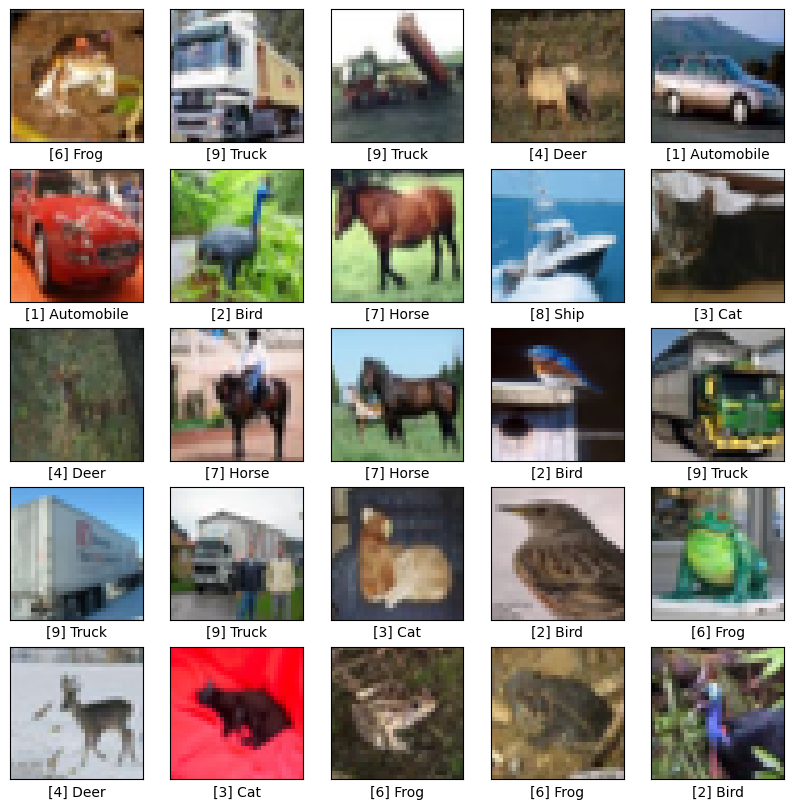

In [ ]:
# display the first 25 images from traing set

plt.figure(figsize=(10,10))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i], cmap=plt.cm.binary) # printing binary/black and white image
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
  plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i][0]])) # Assigning name to each image
plt.show()

In [ ]:
# Pixel value of the image falls between 0 to 255.

xtrain = xtrain/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtrain.shape)

xtest = xtest/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# One hot encoding of the labels.
#(generally we do one hot encoding of the features in EDA but in this case we are doing it for labels)

# Before one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest))

from keras.utils import to_categorical

ytrain=to_categorical(ytrain, num_classes=10)
ytest=to_categorical(ytest, num_classes=10)

# After one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain[0]))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest[1]))

ytrain Shape: (50000, 1) and value: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
ytest Shape: (10000, 1) and value: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
ytrain Shape: (50000, 10) and value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
ytest Shape: (10000, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


# first model

In [ ]:
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# # Add Second convolutional block

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# # Add Third convolutional block
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# # Add Flatten layer. Flatten simply converts matrics to array
model.add(layers.Flatten(input_shape=(32,32))) # this will flatten the image and after this Classification happens

# # Classification segment - fully connected network
# # The Dence layer does classification and is deep neural network. Dense layer always accept the array.
model.add(layers.Dense(128, activation='relu')) # as C5 layer in above image.
model.add(layers.Dense(128, activation='relu')) # as C5 layer in above image.
model.add(layers.Dense(64, activation='relu')) # as C5 layer in above image.
model.add(layers.Dense(32, activation='relu')) # as C5 layer in above image.
model.add(Dropout(0.25))

# # Add the output layer
model.add(layers.Dense(10, activation='softmax')) # as Output layer in above image. The output layer normally have softmax activation

# # Ploting the Model
plot_model(model)

NameError: name 'model' is not defined

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 6, 6, 128)        

In [ ]:
# Train the model
# Using GPU really speeds up this code
xtrain2=xtrain.reshape(50000,32,32,3)
xtest2=xtest.reshape(10000,32,32,3)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [ ]:
model.fit(xtrain2,ytrain,epochs=25,batch_size=64,verbose=True,validation_data=(xtest2,ytest))

Epoch 1/25
782/782 [==============================] - 16s 17ms/step - loss: 1.7248 - accuracy: 0.3482 - val_loss: 1.4034 - val_accuracy: 0.4916
Epoch 2/25
782/782 [==============================] - 13s 17ms/step - loss: 1.2325 - accuracy: 0.5513 - val_loss: 1.1163 - val_accuracy: 0.5955
Epoch 3/25
782/782 [==============================] - 13s 16ms/step - loss: 1.0530 - accuracy: 0.6210 - val_loss: 0.9943 - val_accuracy: 0.6484
Epoch 4/25
782/782 [==============================] - 13s 16ms/step - loss: 0.9480 - accuracy: 0.6626 - val_loss: 0.8824 - val_accuracy: 0.6897
Epoch 5/25
782/782 [==============================] - 13s 17ms/step - loss: 0.8560 - accuracy: 0.6965 - val_loss: 0.8665 - val_accuracy: 0.6946
Epoch 6/25
782/782 [==============================] - 12s 16ms/step - loss: 0.7934 - accuracy: 0.7204 - val_loss: 0.7764 - val_accuracy: 0.7258
Epoch 7/25
782/782 [==============================] - 13s 17ms/step - loss: 0.7407 - accuracy: 0.7377 - val_loss: 0.7933 - val_accuracy:

# second model

In [ ]:
# Inspired from the VGG16 model without the last block
model = keras.Sequential()
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(2,2),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(2,2), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

# model.add(Conv2D(filters=256, kernel_size=(2,2), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(2,2), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# model.add(Dropout(0.5))

# model.add(Conv2D(filters=512, kernel_size=(2,2), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(2,2), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# model.add(Dropout(0.5))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
# opt = Adam(lr=0.1)
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        832       
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 128)       32896     
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 128)       65664     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1000)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist2 = model.fit(xtrain2,ytrain,epochs=25,batch_size=64,verbose=True,validation_data=(xtest,ytest),callbacks=[checkpoint,early])
# hist = model.fit_generator(steps_per_epoch=100,generator=[xtrain,ytrain], validation_data= [xtest,ytest], validation_steps=10,epochs=100,callbacks=[checkpoint,early])

Epoch 1/25
782/782 [==============================] - 32s 37ms/step - loss: 2.3041 - accuracy: 0.1018 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/25
217/782 [=======>......................] - ETA: 19s - loss: 2.3026 - accuracy: 0.1011

782/782 [==============================] - 30s 38ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/25
435/782 [===============>..............] - ETA: 11s - loss: 2.3027 - accuracy: 0.1005

553/782 [====================>.........] - ETA: 7s - loss: 2.3027 - accuracy: 0.1000

KeyboardInterrupt: 

# Model Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(xtest2, ytest)
print("accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.6711 - accuracy: 0.7782
accuracy: 0.7781999707221985


In [ ]:
# predicting lable for test_images

predictions=model.predict(xtest2)

# Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("1. Prediction array: %s" % (predictions[0]))

# we will verify that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0])))

# let us verify what is the label in test_labels.
print("3. Actual label in dataset: %s" % (ytest[0]))

313/313 [==============================] - 1s 2ms/step
1. Prediction array: [1.4428328e-02 2.4035841e-03 1.9170556e-03 8.7876832e-01 2.5917743e-03
 4.1630641e-02 7.8047053e-03 5.4286874e-04 4.8557542e-02 1.3552208e-03]
2. Label number having highest confidence in prediction array: 3
3. Actual label in dataset: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
# creating a funtion which will help to verify the prediction is true of not

def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array

  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  # print(predicted_label)
  # print(true_label)

  if predicted_label == true_label: #setting up label color
    color='blue' # correct then blue colour

  else:
    color='red' # wrong then red colour

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

# function to display bar chart showing whether image prediction is how much correct
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

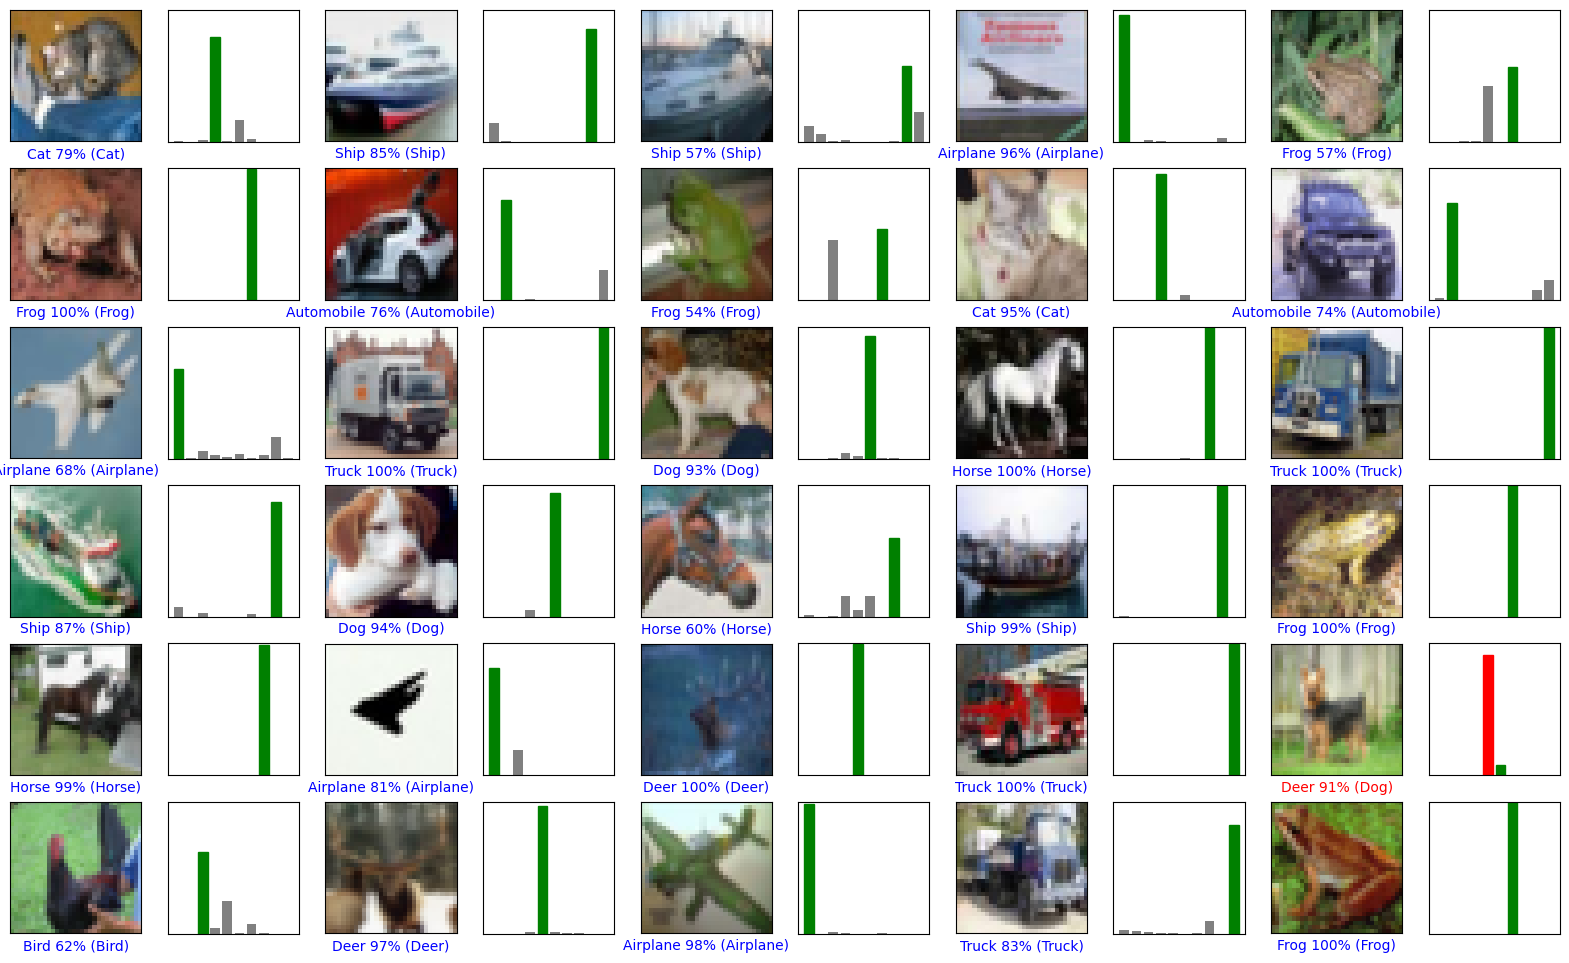

In [ ]:
# verification of several images

num_rows=6
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, ytest)
plt.show()

# Add train val loss graph

# N9AAA

In [ ]:


start=time()

# define a function to create model, required for KerasClassifier
# the function takes drop_out rate as argument so we can optimize it
def create_mlp_model(dropout_rate=0):
    # create model
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(784,)))
    # add a dropout layer if rate is not null
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(64, activation='sigmoid'))
    # add a dropout layer if rate is not null
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(10, activation='softmax'))

    # Compile model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    return model

# define function to display the results of the grid search
def display_cv_results(search_results):
    print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))
    means = search_results.cv_results_['mean_test_score']
    stds = search_results.cv_results_['std_test_score']
    params = search_results.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print('mean test accuracy +/- std = {:.4f} +/- {:.4f} with: {}'.format(mean, stdev, param))

# create model
model = KerasClassifier(build_fn=create_mlp_model, verbose=1)
# define parameters and values for grid search
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [n_epochs_cv],
    'dropout_rate': [0.0, 0.10, 0.20, 0.30],
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=n_cv)
grid_result = grid.fit(X, to_categorical(y))  # fit the full dataset as we are using cross validation

# print out results
print('time for grid search = {:.0f} sec'.format(time()-start))
display_cv_results(grid_result)



In [ ]:
# reload best model
mlp = grid_result.best_estimator_

# retrain best model on the full training set
history = mlp.fit(
    X_train,
    to_categorical(y_train),
    validation_data = (X_val, to_categorical(y_val)),
    epochs = n_epochs,
    callbacks = [early_stop]
)

In [ ]:


# get prediction on validation dataset
y_pred = mlp.predict(X_val)
print('Accuracy on validation data = {:.4f}'.format(accuracy_score(y_val, y_pred)))

# plot accuracy on training and validation data
df_history = pd.DataFrame(history.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);



In [ ]:
# check this out?